In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data = data.dropna(axis=0)
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [7]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
data = data.drop(['Model'], axis=1)

In [9]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Check outliers

<Axes: xlabel='Price', ylabel='Density'>

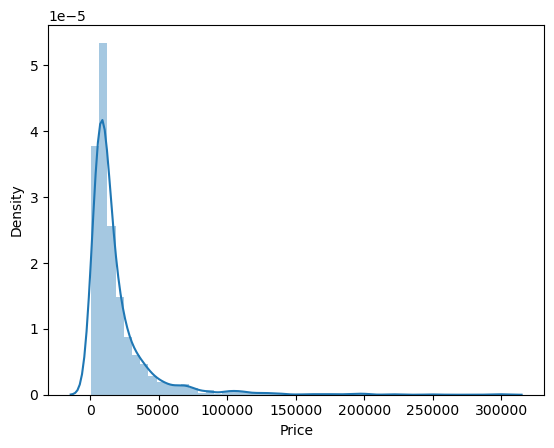

In [10]:
# Check outliers
sns.distplot(data['Price'])

In [11]:
q = data['Price'].quantile(.99)
data = data[data['Price'] < q]

<Axes: xlabel='Price', ylabel='Density'>

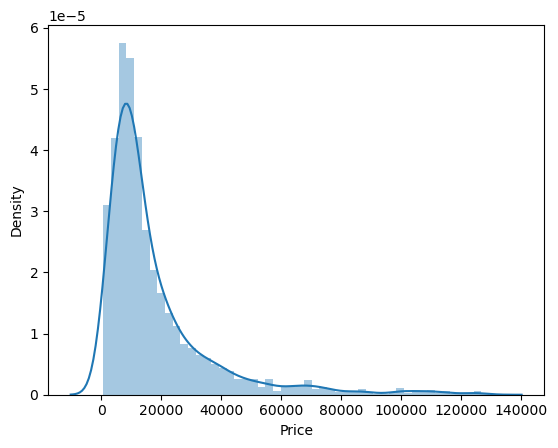

In [12]:
sns.distplot(data['Price'])

<Axes: xlabel='Price', ylabel='Density'>

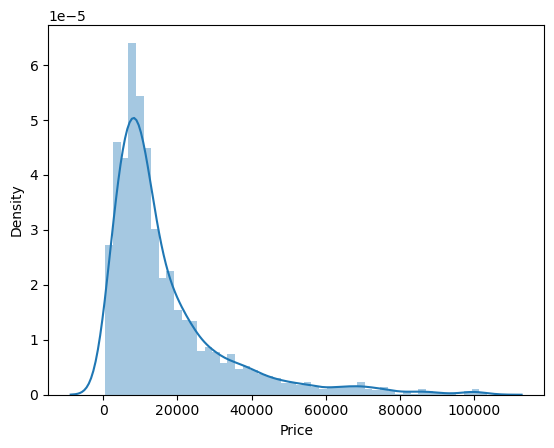

In [13]:
q = data['Price'].quantile(.99)
data = data[data['Price'] < q]
sns.distplot(data['Price'])

<Axes: xlabel='Mileage', ylabel='Density'>

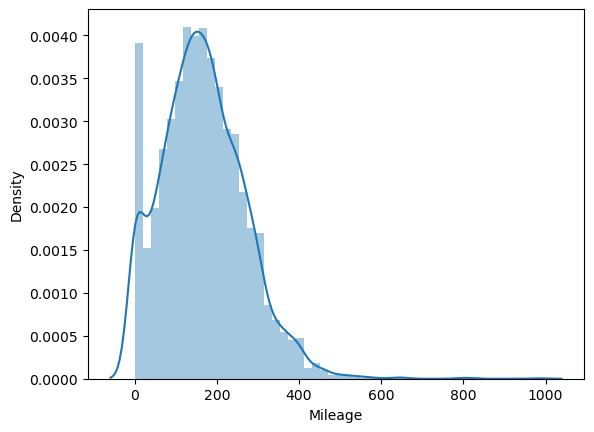

In [22]:
sns.distplot(data['Mileage'])

<Axes: xlabel='Mileage', ylabel='Density'>

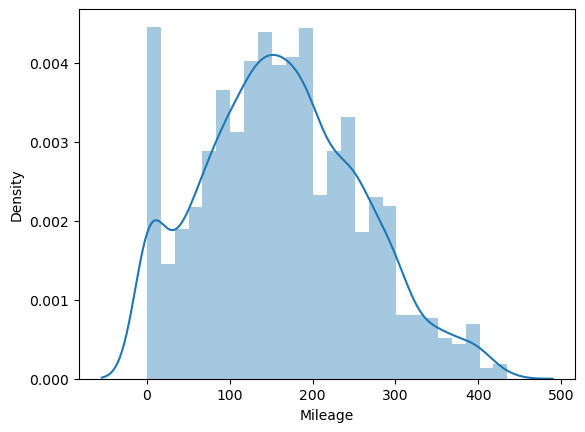

In [25]:
q = data['Mileage'].quantile(.99)
data = data[data['Mileage'] < q]
sns.distplot(data['Mileage'])

<Axes: xlabel='EngineV', ylabel='Density'>

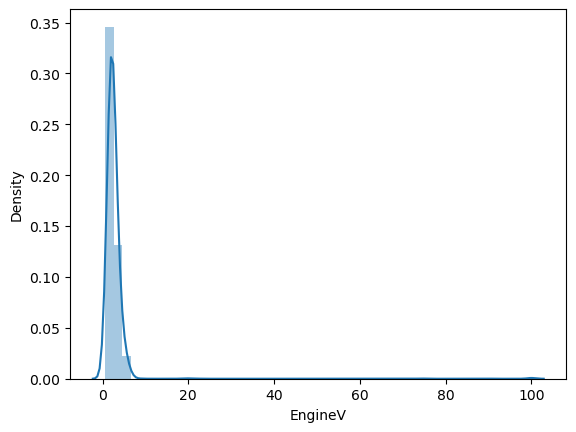

In [27]:
sns.distplot(data['EngineV'])

<Axes: xlabel='EngineV', ylabel='Density'>

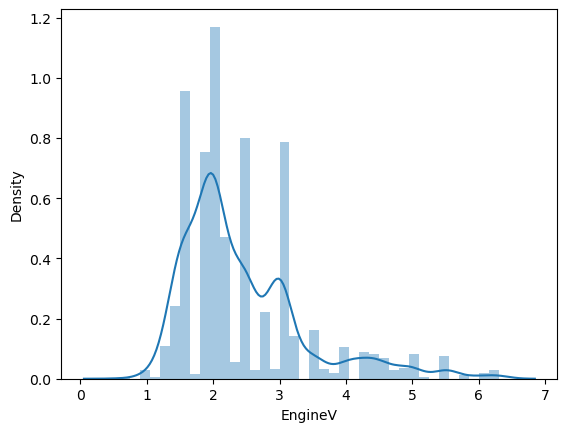

In [29]:
data = data[data['EngineV'] < 6.5]
sns.distplot(data['EngineV'])

<Axes: xlabel='Year', ylabel='Density'>

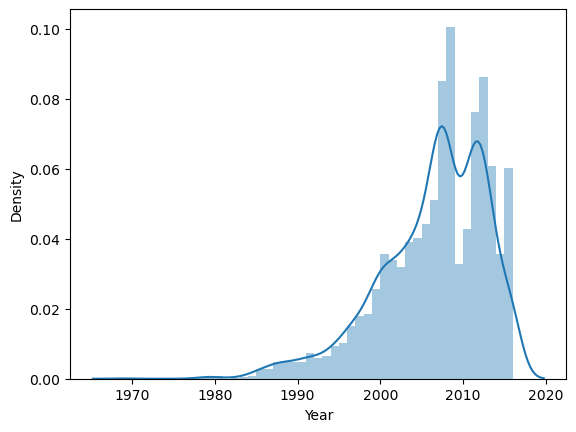

In [34]:
sns.distplot(data['Year'])

<Axes: xlabel='Year', ylabel='Density'>

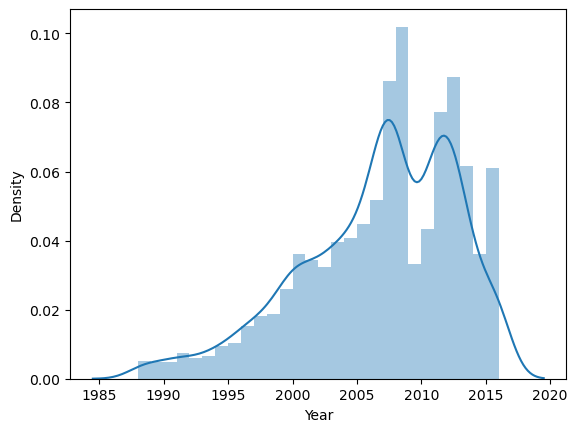

In [36]:
q = data['Year'].quantile(0.01)
data = data[data['Year'] > q]

sns.distplot(data['Year'])

In [38]:
data = data.reset_index(drop=True)

### OLS Assumptions

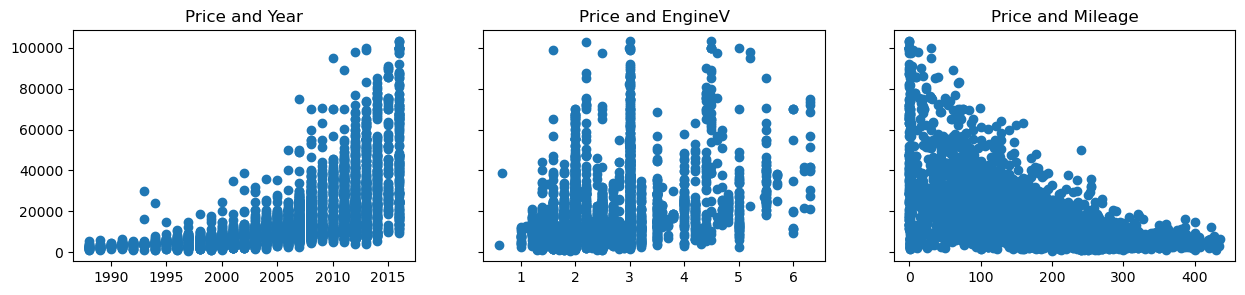

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data['Year'], data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data['EngineV'], data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data['Mileage'], data['Price'])
ax3.set_title('Price and Mileage')

plt.show()

### Log Transformation

In [43]:
log_price = np.log(data['Price'])
data['Log Price'] = log_price

In [45]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [47]:
data = data.drop(['Price'], axis=1)
data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


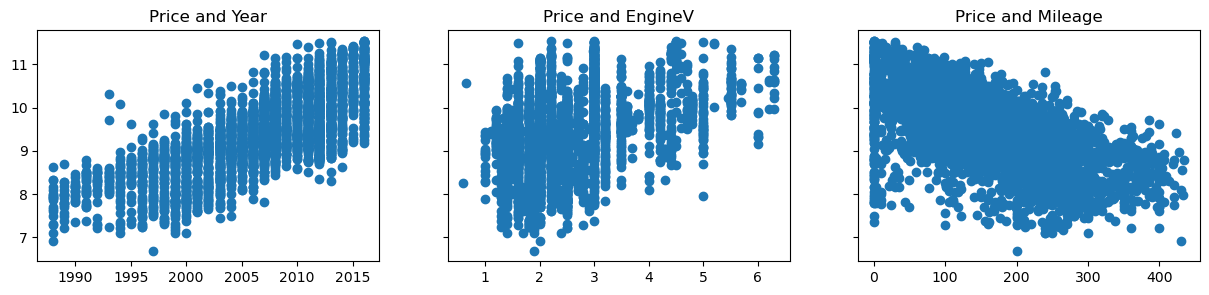

In [49]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data['Year'], data['Log Price'])
ax1.set_title('Price and Year')
ax2.scatter(data['EngineV'], data['Log Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data['Mileage'], data['Log Price'])
ax3.set_title('Price and Mileage')

plt.show()

### Multicollinearity

In [52]:
data.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'Log Price'],
      dtype='object')

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vars = data[['Mileage', 'EngineV', 'Year']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vars.values, i) for i in range(vars.shape[1])]
vif['Features'] = vars.columns
vif

,VIF,Features
0,3.899033,Mileage
1,7.637076,EngineV
2,10.307533,Year


### Dummies

In [57]:
data_dum = pd.get_dummies(data, drop_first=True, dtype=int)
data_dum.head()

,Mileage,EngineV,Year,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [59]:
data_dum.columns

Index(['Mileage', 'EngineV', 'Year', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [61]:
cols = ['Log Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

data_dum = data_dum[cols]
data_dum.head()

,Log Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [63]:
# Check multicollinearity of data with dummies
var_d = data_dum[['Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]

vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(var_d.values, i) for i in range(var_d.shape[1])]
vif2['Features'] = var_d.columns
vif2

,VIF,Features
0,4.947929,Mileage
1,12.005609,EngineV
2,44.527117,Year
3,2.603943,Brand_BMW
4,3.010665,Brand_Mercedes-Benz
5,1.953155,Brand_Mitsubishi
6,2.451928,Brand_Renault
7,2.474322,Brand_Toyota
8,3.470065,Brand_Volkswagen
9,1.695626,Body_hatch


# Regression

In [70]:
X = data_dum.drop(['Log Price'], axis=1)
y = data_dum['Log Price']

### Feature Selection

In [73]:
from sklearn.feature_selection import f_regression

p_val = f_regression(X, y)[1]
p_val.round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  ])

In [74]:
print(np.where(p_val.round(2) == 0.09)[0])

[15]


In [77]:
print(X.columns[15])
print(p_val[15])

Engine Type_Other
0.0893029229373874


In [79]:
X = data_dum.drop(['Log Price'], axis=1)
y = data_dum['Log Price']

In [81]:
X 

,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,152,1.6,2007,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3822,163,2.5,2008,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3823,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3824,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Feature Scaling

In [84]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [86]:
X = scaler.transform(X)

### Splitting

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Ridge

In [126]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [128]:
ridge.score(X_train, y_train)

0.887087232837868

In [130]:
y_train_r_pred = ridge.predict(X_train)
y_test_r_pred = ridge.predict(X_test)

Text(0.5, 1.0, 'Residuals PDF')

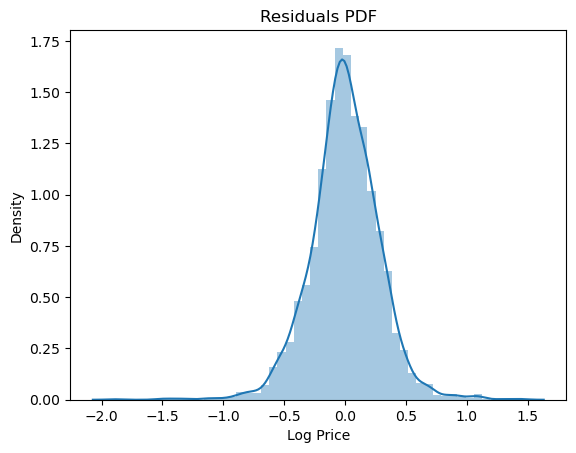

In [132]:
# Visualization
sns.distplot(y_train - y_train_r_pred)
plt.title('Residuals PDF')

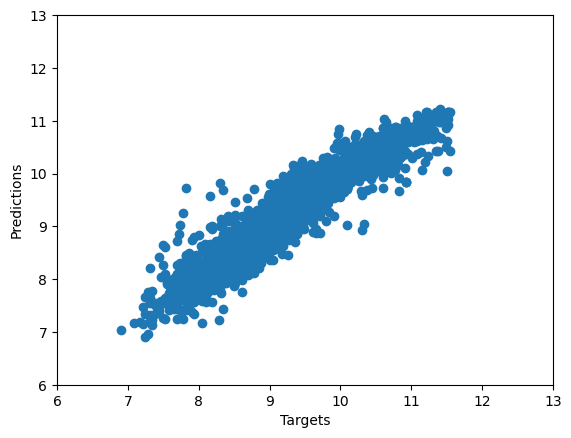

In [136]:
plt.scatter(y_train, y_train_r_pred)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

### Ridge CV

In [266]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [268]:
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [270]:
# Best alpha parameter
print(f"Best alpha (Ridge): {ridge_cv.alpha_}")

Best alpha (Ridge): 1.0


In [272]:
# Cross-validated performance
cv_scores_ridge = cross_val_score(ridge_cv, X_train, y_train, cv=5)
print(f"Cross-validated R^2 (Ridge): {cv_scores_ridge.mean()}")

Cross-validated R^2 (Ridge): 0.8853375806849119


In [273]:
# Predictions and Evaluation
y_train_ridge_cv_pred = ridge_cv.predict(X_train)
y_test_ridge_cv_pred = ridge_cv.predict(X_test)
print(f"Train R^2 (Ridge CV): {r2_score(y_train, y_train_ridge_cv_pred)}")
print(f"Test R^2 (Ridge CV): {r2_score(y_test, y_test_ridge_cv_pred)}")

Train R^2 (Ridge CV): 0.887087232837868
Test R^2 (Ridge CV): 0.8771133813072859


### Lasso

In [145]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)

Lasso(alpha=0.1)

In [147]:
ls.score(X_train, y_train)

0.7894695810684962

In [149]:
y_train_ls_pred = ls.predict(X_train)
y_test_ls_pred = ls.predict(X_test)

Text(0.5, 1.0, 'Residuals PDF')

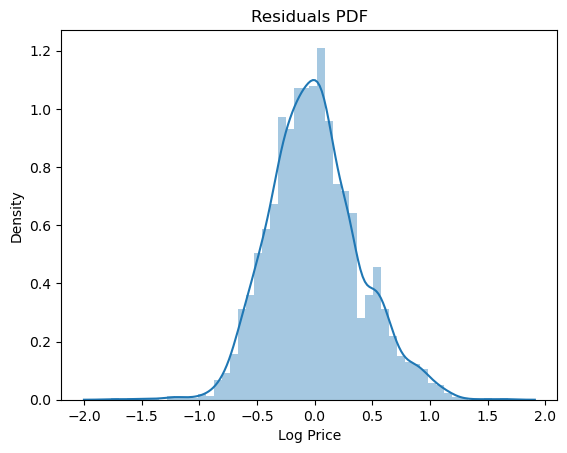

In [155]:
#Visualize
sns.distplot(y_train - y_train_ls_pred)
plt.title('Residuals PDF')

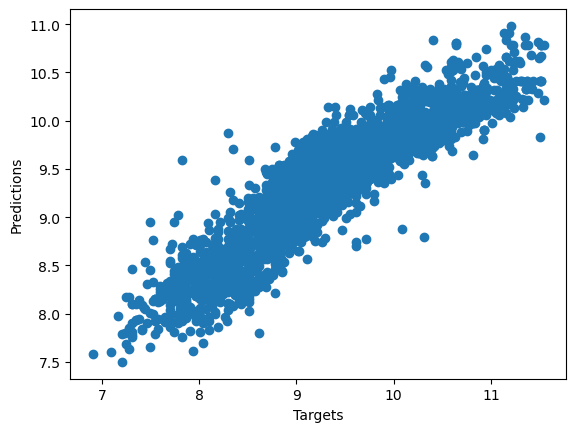

In [157]:
plt.scatter(y_train, y_train_ls_pred)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()

### Linear Regression

In [184]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [186]:
lr.score(X_train, y_train)

0.8870873880982245

### HuberRegressor

In [107]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(alpha=0.01, max_iter=100, epsilon=1.3)
huber.fit(X_train, y_train)

HuberRegressor(alpha=0.01, epsilon=1.3)

In [109]:
y_train_pred_huber = huber.predict(X_train)
y_test_pred_huber = huber.predict(X_test)

In [111]:
huber.score(X_train, y_train)

0.8865929818918218

Text(0.5, 1.0, 'Residuals PDF')

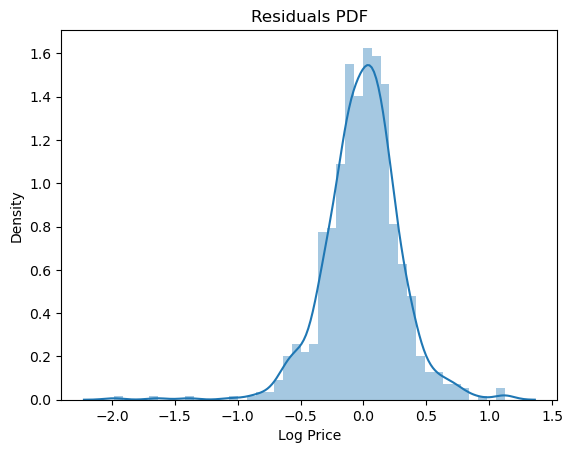

In [113]:
sns.distplot(y_test - y_test_pred_huber)
plt.title('Residuals PDF')

# Testing

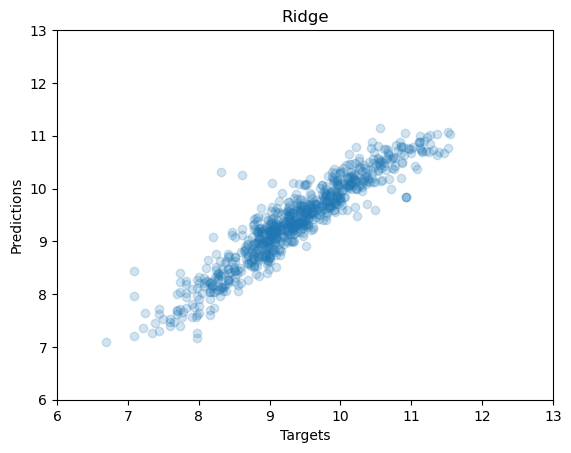

In [151]:
plt.scatter(y_test, y_test_r_pred, alpha=0.2)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.title('Ridge')
plt.show()

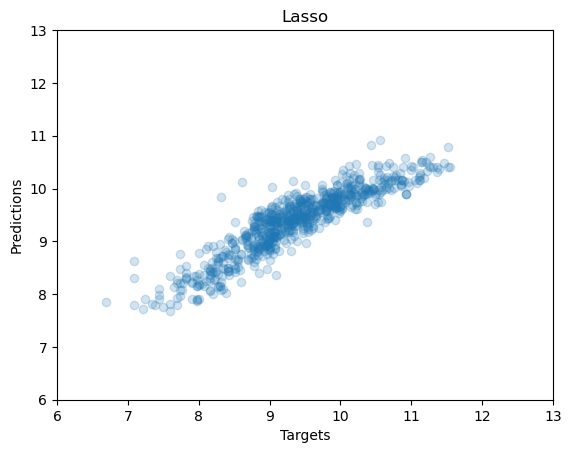

In [159]:
plt.scatter(y_test, y_test_ls_pred, alpha=0.2)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.title('Lasso')
plt.show()

In [175]:
rdf = pd.DataFrame()
rdf['Ridge Predictions'] = np.exp(y_test_r_pred)

In [177]:
y_test = y_test.reset_index(drop=True)
rdf['Targets'] = np.exp(y_test)
rdf

,Ridge Predictions,Targets
0,30987.298135,37500.00
1,24604.361801,21999.00
2,3485.206292,3200.00
3,23555.921024,13300.95
4,7224.262297,5750.00
...,...,...
761,38302.488529,45000.00
762,13495.547441,15900.00
763,22989.908053,21700.00
764,4205.681124,4100.00


In [179]:
rdf['Residuals'] = rdf['Targets'] - rdf['Ridge Predictions']
rdf

,Ridge Predictions,Targets,Residuals
0,30987.298135,37500.00,6512.701865
1,24604.361801,21999.00,-2605.361801
2,3485.206292,3200.00,-285.206292
3,23555.921024,13300.95,-10254.971024
4,7224.262297,5750.00,-1474.262297
...,...,...,...
761,38302.488529,45000.00,6697.511471
762,13495.547441,15900.00,2404.452559
763,22989.908053,21700.00,-1289.908053
764,4205.681124,4100.00,-105.681124
